Notebook con entrenamiento del modelo XGBoost con el dataframe con datos de peleas

Autor: Mateo Turati

Descripción: Obtengo los datos de train, validación y test, esta vez de forma aleatoria. Creo dos modelos de XGBoostClassifier usando dos métodos de ajuste de hiperparámetros y estudio sus resultados.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV,train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,log_loss, make_scorer, f1_score, roc_auc_score, precision_score, recall_score
import os
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Leo los df divididos en orden cronológico de forma que los resultados sean lo más reales posibles
ruta_train =  os.path.join("..","..", "data", "P1","train.parquet")
df_train = pd.read_parquet(ruta_train)
df_train.head()

,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,METHOD,TIME,ROUND,KD_A,KD_B,...,Victorias_Sub_A,Victorias_Sub_B,Victorias_Decision_A,Victorias_Decision_B,Derrotas_KO_A,Derrotas_KO_B,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B
0,Olivier Aubin-Mercier,Tony Sims,2015-08-23,LIGHTWEIGHT,False,Decision - Unanimous,300,3,0,0,...,2,0,1,0,0,0,0,0,1,1
1,Elvis Mutapcic,Anthony Smith,2016-12-03,MIDDLEWEIGHT,True,KO/TKO,207,2,0,1,...,0,0,1,1,1,0,0,1,1,1
2,Michael Johnson,Edward Faaloloto,2011-06-26,LIGHTWEIGHT,False,KO/TKO,282,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3,Polyana Viana,Mallory Martin,2021-02-13,STRAWWEIGHT,False,Submission,198,1,0,0,...,3,1,0,0,0,0,1,2,2,0
4,Charles Jourdain,Nathaniel Wood,2022-09-03,FEATHERWEIGHT,True,Decision - Unanimous,300,3,0,0,...,1,3,1,3,0,1,1,0,5,1


In [4]:
ruta_val = os.path.join("..","..", "data", "P1","validation.parquet")
df_val = pd.read_parquet(ruta_val)
df_val.head()

,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,METHOD,TIME,ROUND,KD_A,KD_B,...,Victorias_Sub_A,Victorias_Sub_B,Victorias_Decision_A,Victorias_Decision_B,Derrotas_KO_A,Derrotas_KO_B,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B
0,Yaotzin Meza,Sergio Pettis,2014-06-07,BANTAMWEIGHT,True,Decision - Unanimous,300,3,0,0,...,1,0,0,2,1,0,0,1,1,0
1,Rob Kimmons,Dongi Yang,2011-03-03,MIDDLEWEIGHT,True,KO/TKO,287,2,0,1,...,2,0,1,0,2,0,2,0,0,1
2,Michel Pereira,Tristan Connelly,2019-09-14,WELTERWEIGHT,True,Decision - Unanimous,300,3,0,0,...,0,0,0,1,0,0,0,0,1,0
3,Punahele Soriano,Uros Medic,2025-01-18,WELTERWEIGHT,False,KO/TKO,31,1,1,0,...,0,0,1,0,1,1,1,2,2,0
4,Muslim Salikhov,Laureano Staropoli,2019-10-26,WELTERWEIGHT,False,Decision - Unanimous,300,3,0,0,...,0,0,1,2,0,0,1,0,0,1


In [5]:
ruta_test = os.path.join("..","..", "data", "P1","test.parquet")
df_test = pd.read_parquet(ruta_test)
df_test.head()

,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,METHOD,TIME,ROUND,KD_A,KD_B,...,Victorias_Sub_A,Victorias_Sub_B,Victorias_Decision_A,Victorias_Decision_B,Derrotas_KO_A,Derrotas_KO_B,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B
0,John Phillips,Khamzat Chimaev,2020-07-15,MIDDLEWEIGHT,True,Submission,72,2,0,0,...,0,1,0,0,0,0,3,0,1,0
1,Bob Cook,Tiki Ghosn,2000-03-10,LIGHTWEIGHT,False,Submission,89,2,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Joshua Burkman,KJ Noons,2016-02-06,LIGHTWEIGHT,False,Decision - Unanimous,300,3,0,0,...,1,0,4,1,1,0,3,1,3,2
3,Tai Tuivasa,Greg Hardy,2021-07-10,HEAVYWEIGHT,False,KO/TKO,67,1,1,0,...,0,0,1,1,1,2,1,0,1,1
4,Georges St-Pierre,Josh Koscheck,2010-12-11,WELTERWEIGHT,False,Decision - Unanimous,300,5,0,0,...,2,3,8,5,1,1,1,1,0,3


In [6]:
X_train = df_train.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_train = df_train["WINNER"]
y_train.value_counts(normalize=True)

WINNER
False    0.627322
True     0.372678
Name: proportion, dtype: float64

In [7]:
X_val = df_val.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_val = df_val["WINNER"]
y_val.value_counts(normalize=True)

WINNER
False    0.639762
True     0.360238
Name: proportion, dtype: float64

In [8]:
X_test = df_test.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_test = df_test["WINNER"]
y_test.value_counts(normalize=True)

WINNER
False    0.633815
True     0.366185
Name: proportion, dtype: float64

### TRANSFORMACIONES

Para el modelo XGBoost no es necesario realizar transformaciones previas de las variables, como la normalización o estandarización, ya que al ser un modelo basado en árboles de decisión, no se ve afectado por las diferencias en las escalas de los valores ni por la falta de normalidad en la distribución de las variables. Los árboles utilizan divisiones basadas en umbrales y no dependen de operaciones algebraicas sensibles a las magnitudes de las variables.

### SELECCIÓN DE VARIABLES

El modelo XGBoostClassifier no requiere una selección explícita de variables antes del entrenamiento. Al ser un modelo de ensamble de árboles, cada nodo selecciona automáticamente la variable que proporciona la mayor ganancia de información o reducción de impureza. Las variables irrelevantes tienden a ser ignoradas durante las divisiones, por lo que no contribuyen significativamente al modelo final ni añaden ruido. Además, XGBoost incluye regularización, lo que ayuda a reducir aún más el impacto de características poco informativas

### AJUSTE DE HIPERPARÁMETROS

Para buscar una configuración óptima de hiperparámetros he utilizado dos estrategias, GridSearchCV y RandomizedSearchCV. 

En esta estrategia, he definido una cuadrícula (diccionario) con cada hiperparámetro y los posibles valores que pueden tomar. GridSearchCV realiza una búsqueda exhaustiva probando todas las combinaciones posibles de hiperparámetros, evaluando cada modelo mediante validación cruzada. El objetivo es encontrar la combinación que maximice el rendimiento del modelo según el F1-score. Una vez identificado el mejor conjunto de hiperparámetros, procederemos a estudiar el comportamiento del modelo óptimo.

A diferencia de GridSearchCV, RandomizedSearchCV también explora combinaciones de hiperparámetros, pero en lugar de probar todas las combinaciones posibles, selecciona un número fijo de combinaciones al azar. Esto permite explorar un espacio más amplio de hiperparámetros con un menor costo computacional. Al igual que en la búsqueda exhaustiva, las combinaciones son evaluadas mediante validación cruzada, y se selecciona el modelo que optimiza el F1-score.

In [7]:
def train_xgboost_grid(X_train, y_train, X_val, y_val):
    # Calcular pesos de clase para manejar desbalance de datos
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    scale_pos_weight = class_weights[1] / class_weights[0] if len(class_weights) > 1 else 1

    # Definir modelo base
    xgb = XGBClassifier(random_state=42)

    # Cuadrícula de hiperparámetros con y sin ajuste de pesos
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 15],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 1.0],
        'colsample_bytree': [0.7, 1.0],
        'gamma': [0, 0.1, 0.5],
        'min_child_weight': [3, 5],
        'scale_pos_weight': [1, scale_pos_weight]  # 1 = sin ajuste, otro valor = con ajuste
    }

    f1_scorer = make_scorer(f1_score, average='macro')

    # Búsqueda con validación cruzada
    grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        scoring=f1_scorer,  # Optimiza F1-macro
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    # Entrenar el modelo
    grid_search.fit(X_train, y_train)

    # Imprimir mejores parámetros
    print("Mejores parámetros:", grid_search.best_params_)

    # Evaluar el mejor modelo en el conjunto de validación
    y_pred = grid_search.best_estimator_.predict(X_val)
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_pred))

    return grid_search.best_estimator_

In [8]:
print("--- Entrenamiento usando ajuste de hiperparámetros con GridSeachCV ---")
best_grid = train_xgboost_grid(X_train,y_train,X_val,y_val)

--- Entrenamiento usando ajuste de hiperparámetros con GridSeachCV ---
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores parámetros: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1.0}
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       804
        True       0.95      0.89      0.92       451

    accuracy                           0.95      1255
   macro avg       0.95      0.93      0.94      1255
weighted avg       0.95      0.95      0.94      1255



In [20]:
print("-- Métricas del modelo con hiperparámetros ajustados --")
y_val_pred = best_grid.predict(X_val)
y_val_prob = best_grid.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, y_val_pred))
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_prob)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val,y_val_prob)
print(f"F1-Score: {f1_val:.4f}")
print(f"AUC-ROC: {roc_auc_val:.4f}")
print(f"Precisión: {precision_val:.4f}")
print(f"Sensibilidad: {recall_val:.4f}")
print(f"Log-loss: {log_loss_val}")

-- Métricas del modelo con hiperparámetros ajustados --
Accuracy: 0.9450199203187251
F1-Score: 0.9210
AUC-ROC: 0.9886
Precisión: 0.9526
Sensibilidad: 0.8914
Log-loss: 0.13767414453669438


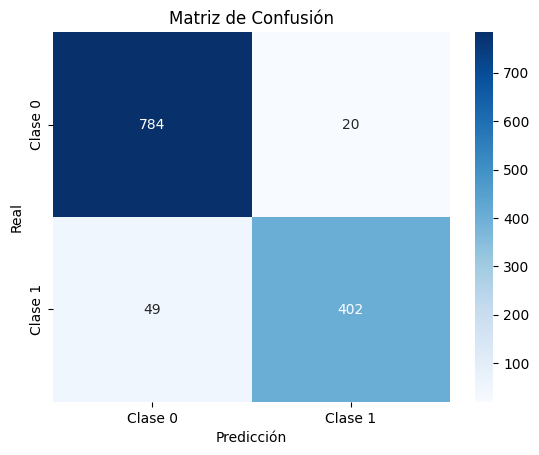

In [21]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [12]:
def train_xgboost_random(X_train, y_train, X_val, y_val):
    # Calcular pesos de clase para manejar desbalance de datos
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    scale_pos_weight = class_weights[1] / class_weights[0] if len(class_weights) > 1 else 1

    # Definir modelo base
    xgb = XGBClassifier(random_state=42)

    # Distribución de hiperparámetros para búsqueda aleatoria
    param_dist = {
        'n_estimators': np.arange(50, 400, 50),
        'max_depth': np.arange(3, 30, 3),
        'learning_rate': np.linspace(0.01, 0.2, 10),
        'subsample': np.linspace(0.5, 1.0, 6),
        'colsample_bytree': np.linspace(0.5, 1.0, 6),
        'gamma': np.linspace(0, 0.5, 6),
        'min_child_weight': np.arange(1, 10, 2),
        'scale_pos_weight': [1, scale_pos_weight]
    }

    # Definir la métrica de optimización como el F1-score macro
    f1_scorer = make_scorer(f1_score, average='macro')

    # Búsqueda con validación cruzada
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        scoring=f1_scorer,
        n_iter=50,
        cv=5,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    # Entrenar el modelo
    random_search.fit(X_train, y_train)

    # Imprimir mejores parámetros
    print("Mejores parámetros:", random_search.best_params_)

    # Evaluar el mejor modelo en el conjunto de validación
    y_pred = random_search.best_estimator_.predict(X_val)
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_pred))

    return random_search.best_estimator_

In [13]:
print("-- Entrenamiento usando ajuste de hiperparámetros con RandomizedSeachCV --")
best_random = train_xgboost_random(X_train,y_train,X_val,y_val)

-- Entrenamiento usando ajuste de hiperparámetros con RandomizedSeachCV --
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'subsample': np.float64(0.9), 'scale_pos_weight': np.float64(1.6617179215270415), 'n_estimators': np.int64(300), 'min_child_weight': np.int64(5), 'max_depth': np.int64(21), 'learning_rate': np.float64(0.2), 'gamma': np.float64(0.1), 'colsample_bytree': np.float64(0.7)}
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       804
        True       0.95      0.92      0.93       451

    accuracy                           0.95      1255
   macro avg       0.95      0.94      0.95      1255
weighted avg       0.95      0.95      0.95      1255



In [18]:
print("-- Métricas del modelo con hiperparámetros ajustados --")
y_val_pred = best_random.predict(X_val)
y_val_prob = best_random.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, y_val_pred))
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_prob)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val,y_val_prob)

print(f"F1-Score: {f1_val:.4f}")
print(f"AUC-ROC: {roc_auc_val:.4f}")
print(f"Precisión: {precision_val:.4f}")
print(f"Sensibilidad: {recall_val:.4f}")
print(f"Log-loss: {log_loss_val}")
print(confusion_matrix(y_val, y_val_pred))


-- Métricas del modelo con hiperparámetros ajustados --
Accuracy: 0.951394422310757
F1-Score: 0.9314
AUC-ROC: 0.9882
Precisión: 0.9452
Sensibilidad: 0.9180
Log-loss: 0.1423509939532568
[[780  24]
 [ 37 414]]


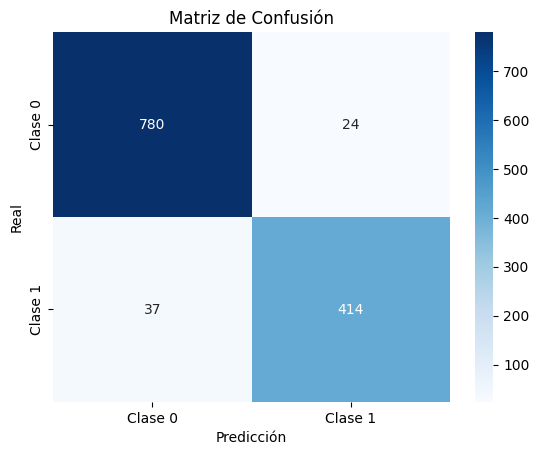

In [19]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

En conclusión, en este caso, RandomizedSearchCV ha obtenido un mejor resultado que GridSearchCV. Esto se debe a que, al explorar combinaciones de hiperparámetros de forma aleatoria, logró identificar una configuración óptima que no estaba contemplada en la cuadrícula predefinida de GridSearchCV. Además, este enfoque implicó un menor coste computacional, dado que evaluó menos combinaciones posibles.